In [608]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina' 


import os
import sys
import numpy as np
from glob import glob
from itertools import cycle
import matplotlib as mpl
import pandas as pd
from glob import glob
from pprint import pprint as pp
from IPython.display import display
import matplotlib.pyplot as plt


HOME = os.environ['HOME']
PROJECT_DIR = os.path.join(HOME, 'projects/cikm2017/')
FIGURES_DIR = os.path.join(HOME, 'projects/cikm2017/figures')
# HDF_DIR = os.path.join(PROJECT_DIR, 'data/hdf5')
NDCG_DIR = '/Users/khalil/projects/cikm2017/data/ndcg/'

sys.path.append(PROJECT_DIR)
os.chdir(PROJECT_DIR) 
os.makedirs(FIGURES_DIR, exist_ok=True)

HDF_DIR = '/Users/khalil/projects/explanations/hdf5/'

paths = glob(os.path.join(HDF_DIR, '*.h5'))
pp(paths[:4])

import cikm
from cikm.plots import(plot_pros_and_cons, latexify, inches_to_points, 
                       points_to_inches, plot_avg_strengths_for_weight, plot_ndcgs_all)

COLUMN_WIDTH_PTS = 241.14749

RANK_COLS = {'rank_related_items_sims_np': 'CS', 
             'rank_strength': 'EX', 
             'rank_target_item_average_rating': 'AR', 
             'rank_biasedmf': 'MF'}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/Users/khalil/projects/explanations/hdf5/ba-bw-nw-a00-sessions.h5',
 '/Users/khalil/projects/explanations/hdf5/ba-bw-nw-a01-sessions.h5',
 '/Users/khalil/projects/explanations/hdf5/ba-bw-nw-a02-sessions.h5',
 '/Users/khalil/projects/explanations/hdf5/ba-bw-nw-a03-sessions.h5']


In [126]:
def extract_dataset_id(path):
    idx = path.rfind('/')
    filename = path[idx + 1:]
    dataset_id = filename.replace('_sessions.h5', '')
    return dataset_id

## Load Explanations

In [127]:
paths = glob(os.path.join('/Users/khalil/projects/cikm2017/data/hdf5/*_sessions.h5'))
pp(paths[:2])
pp(list(map(extract_dataset_id, paths[:2])))

# Load all explanations
explanations = {}

for p in paths:
    print('Loading explanation from %s' % p)
    dataset_id = extract_dataset_id(p)
    explanations[dataset_id] = pd.read_hdf(p)
    
exclude_cols = ['better_avg', 'better_avg_comp', 'better_count', 
                'better_pro_scores', 'cons', 'cons_comp', 
                'is_comp', 'pros', 'pros_comp', 'rank_strength_comp', 'worse_avg',
                'worse_avg_comp', 'worse_con_scores',
                'worse_count']

for dataset, df in explanations.items(): 
    print('Dropping columns in %s' % dataset)
    exclude_cols = filter(lambda c: c in df.columns, exclude_cols)
    df.drop(exclude_cols, axis=1, inplace=True)
    
for dataset, df in explanations.items():
    exclude_cols = [c for c in df.columns 
                    if 'strength_' in c and c != 'strength_comp' or 'ndcg' in c]
    df.drop(exclude_cols, inplace=True, axis=1)

['/Users/khalil/projects/cikm2017/data/hdf5/ba_bw_iw_sessions.h5',
 '/Users/khalil/projects/cikm2017/data/hdf5/ba_bw_nw_sessions.h5']
['ba_bw_iw', 'ba_bw_nw']
Loading explanation from /Users/khalil/projects/cikm2017/data/hdf5/ba_bw_iw_sessions.h5
Loading explanation from /Users/khalil/projects/cikm2017/data/hdf5/ba_bw_nw_sessions.h5
Loading explanation from /Users/khalil/projects/cikm2017/data/hdf5/ba_bw_uw_sessions.h5
Loading explanation from /Users/khalil/projects/cikm2017/data/hdf5/ta_bw_iw_sessions.h5
Loading explanation from /Users/khalil/projects/cikm2017/data/hdf5/ta_bw_nw_sessions.h5
Loading explanation from /Users/khalil/projects/cikm2017/data/hdf5/ta_bw_uw_sessions.h5
Loading explanation from /Users/khalil/projects/cikm2017/data/hdf5/yp_bw_iw_sessions.h5
Loading explanation from /Users/khalil/projects/cikm2017/data/hdf5/yp_bw_nw_sessions.h5
Loading explanation from /Users/khalil/projects/cikm2017/data/hdf5/yp_bw_uw_sessions.h5
Dropping columns in ba_bw_iw
Dropping columns in 

## Average strength scores, by rank, for the each of the 4 rankings/3 domains in figure 3.

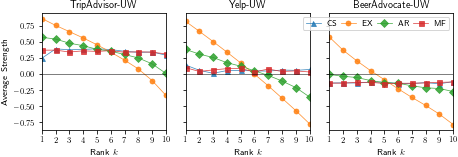

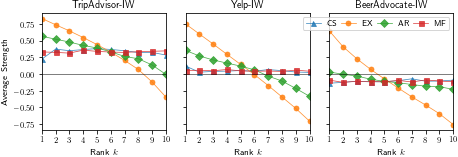

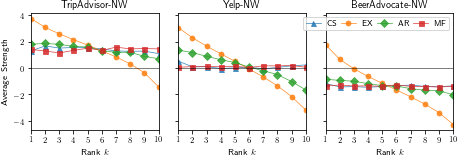

In [602]:
params = dict(column_width_pt=COLUMN_WIDTH_PTS, explanations=explanations, figures_dir=FIGURES_DIR, 
              title_fontsize=10, xlabel_fontsize=9)
plot_avg_strengths_for_weight(weight='uw', **params)
plot_avg_strengths_for_weight(weight='iw', **params)
plot_avg_strengths_for_weight(weight='nw', **params)

## Ratios of Strength Scores

In [181]:
fmt = '../data/avg-strength-per-rank-*-*.csv'

def _g():
    for p in glob(fmt):
        dataset_id = p[p.rfind('/') + 1:].replace('avg-strength-per-rank-', '').replace('.csv', '')
        dataset, weight = dataset_id.split('-')

        df = pd.read_csv(p)
        
        df['dataset_id'] = dataset_id
        df['dataset'] = dataset
        df['weight'] = weight
        
        yield df
    
df = pd.concat(_g())
df.columns = [c.replace('avg_strength_rank_', 'r_').replace('target_item_', '')
              for c in df.columns]

cols = [c for c in df.columns if 'r_' in c]
print(df[cols].max().max(), df[cols].min().min())
display(df.head(2))

for c in df.columns:
    if c not in ('r_average_rating', 'dataset', 'rank_pos', 'dataset_id', 'dataset', 'weight'):
        print(c)
        df[c] = df[c] / df['r_average_rating']

df['r_average_rating'] = df['r_average_rating'] / df['r_average_rating']

display(df.head(2))

3.74972367287 -4.27534484863


,rank_pos,r_related_items_sims_np,r_strength,r_average_rating,r_biasedmf,dataset_id,dataset,weight
0,1,-0.140061,0.654448,0.031513,-0.092618,ba-iw,ba,iw
1,2,-0.126383,0.414336,-0.004972,-0.126038,ba-iw,ba,iw


r_related_items_sims_np
r_strength
r_biasedmf


,rank_pos,r_related_items_sims_np,r_strength,r_average_rating,r_biasedmf,dataset_id,dataset,weight
0,1,-4.444586,20.767784,1.0,-2.939086,ba-iw,ba,iw
1,2,25.421292,-83.341531,1.0,25.351812,ba-iw,ba,iw


In [182]:
0.654448 - 0.031513

0.622935

In [183]:
-0.126383 - -0.004972

-0.12141099999999999

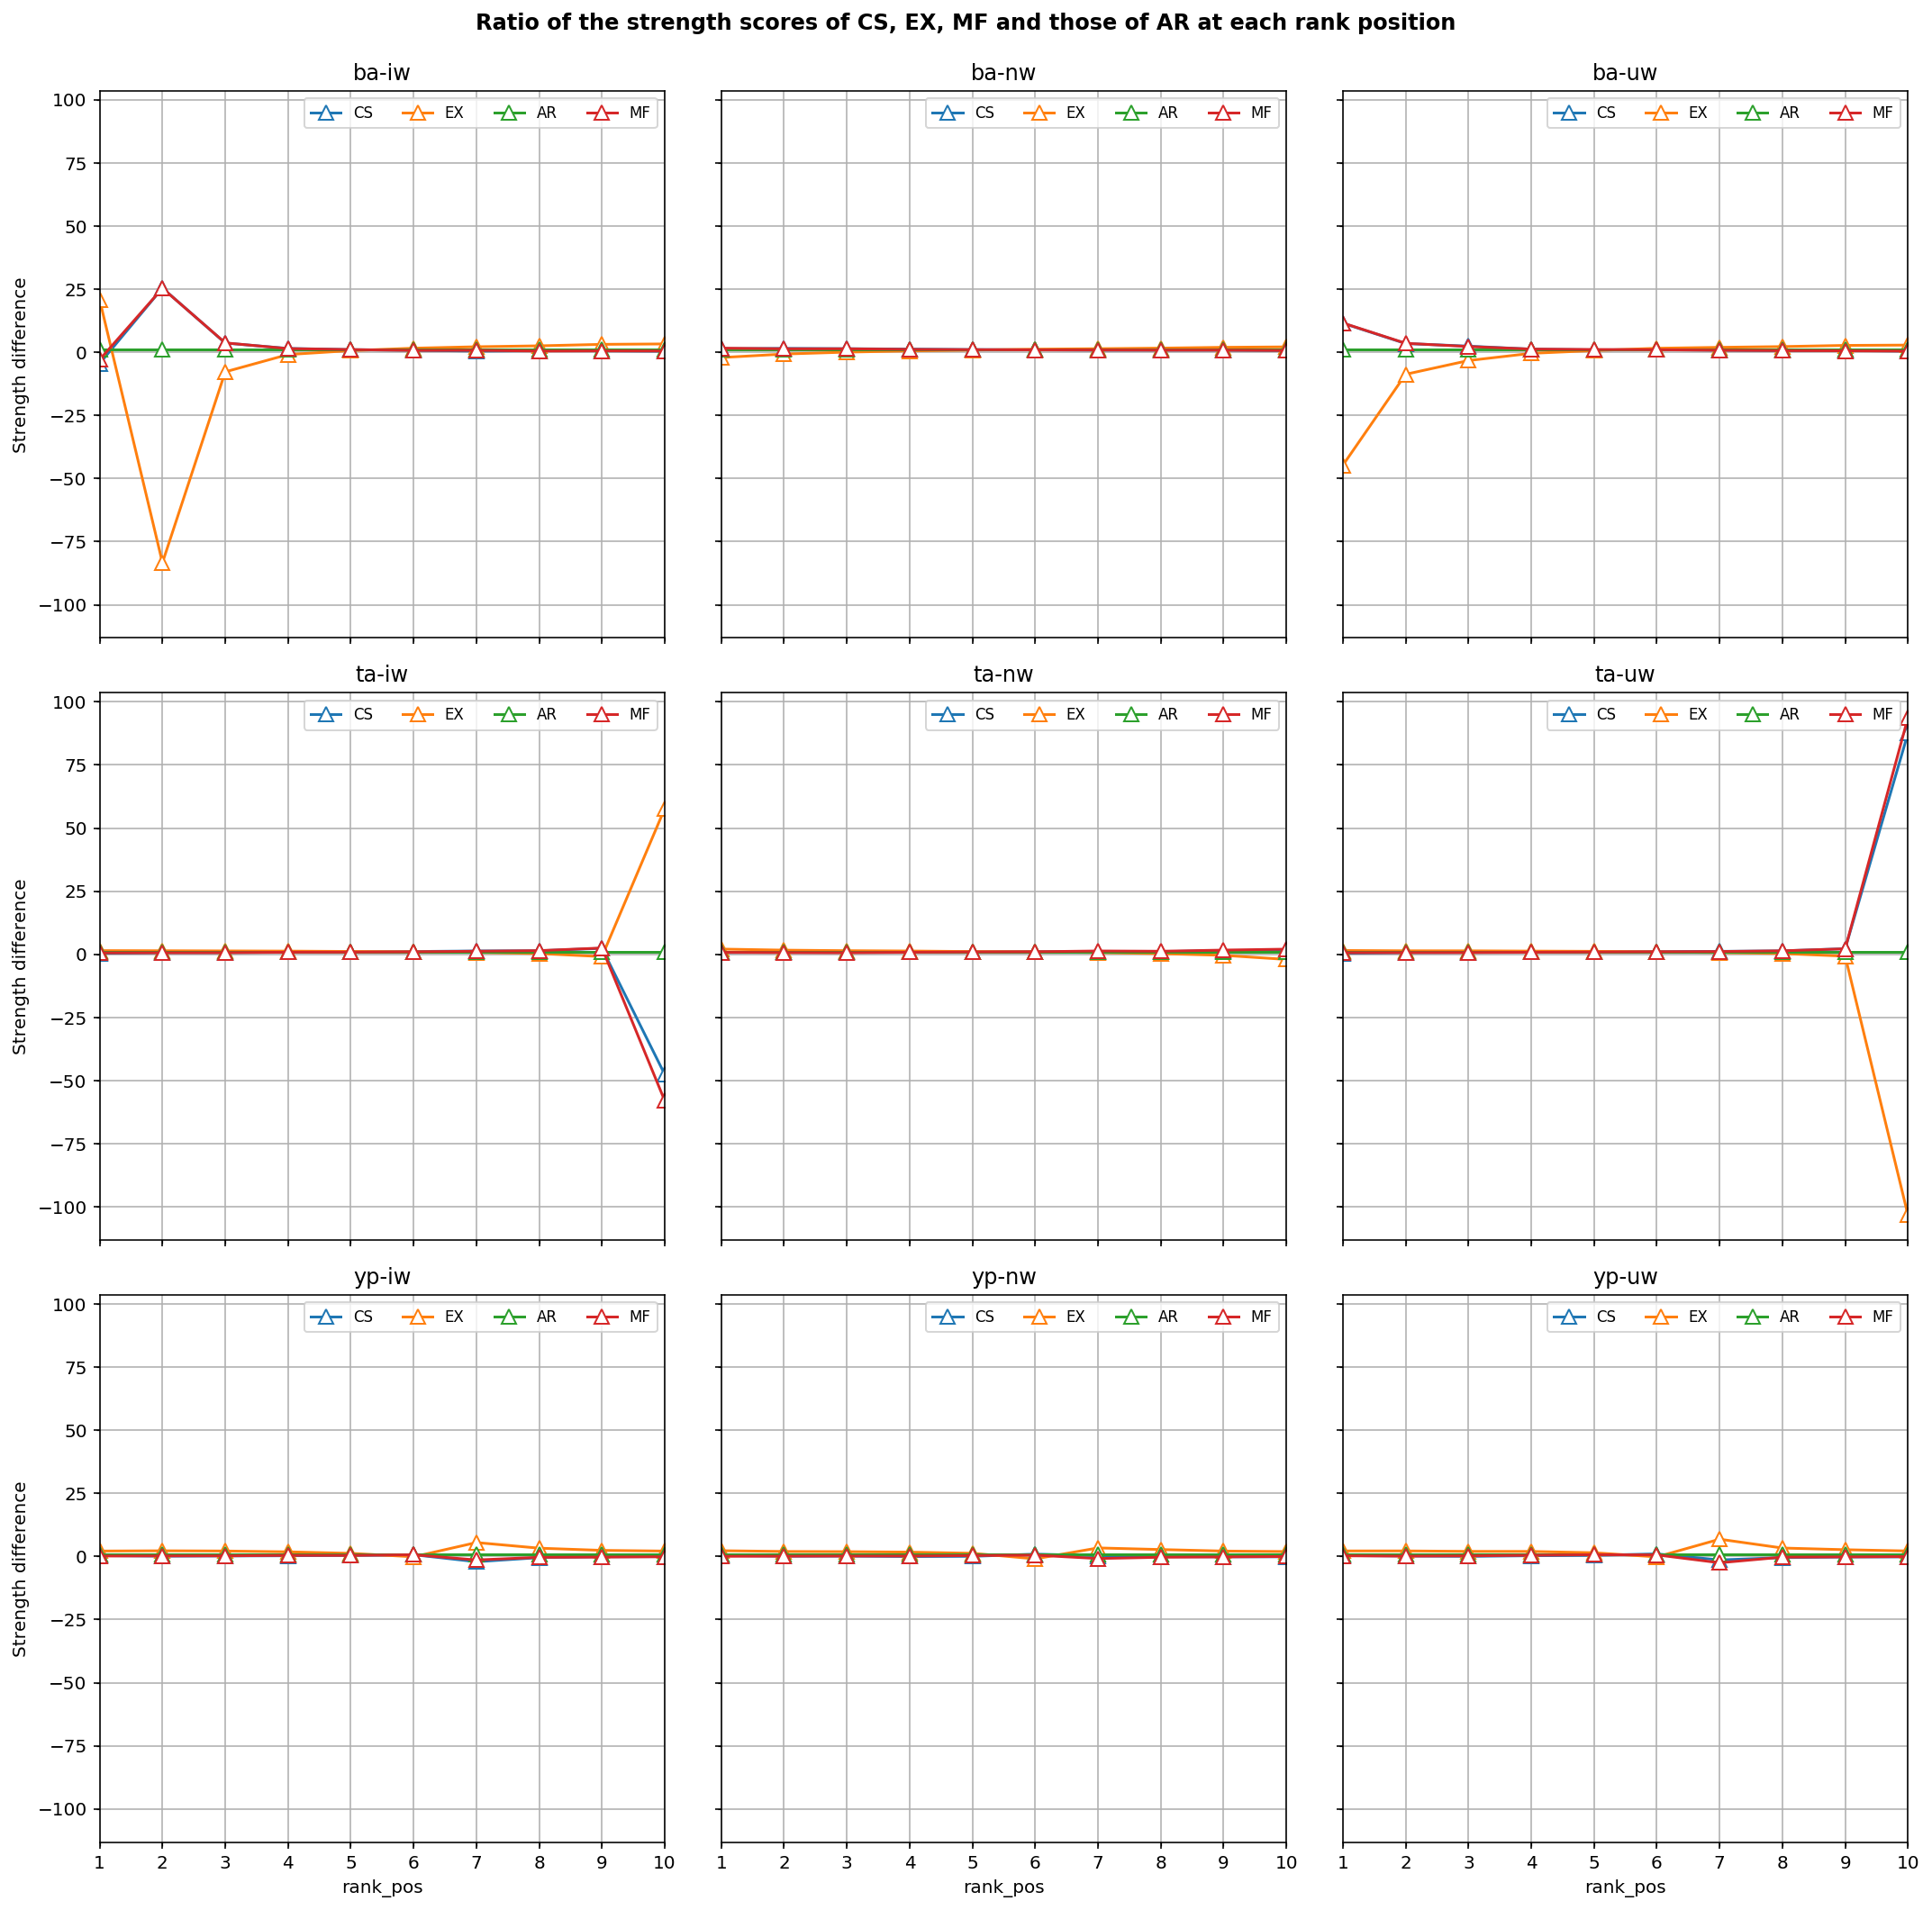

In [185]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15,15), sharex=True, sharey=True)

for dataset_id, ax in zip(df.dataset_id.unique(), axes.flatten()):
    (df.query('dataset_id == @dataset_id').set_index('rank_pos')
     .rename(columns={'r_related_items_sims_np': 'CS', 'r_strength': 'EX',
                      'r_average_rating': 'AR', 'r_biasedmf': 'MF'})
     .plot(ax=ax, marker='^', ms=8, markerfacecolor='white', title=dataset_id))
#     ax.axvline(x=5, ls='--')
    ax.grid(True)
    ax.set_ylabel('Strength difference')
    ax.legend(
        ncol=4, 
        fontsize='small', loc='best',borderpad=0.45)
# plt.suptitle('Difference in the strength scores of CS, EX, MF and those of AR at each rank position', 
#              fontweight='bold', fontsize='large')
plt.suptitle('Ratio of the strength scores of CS, EX, MF and those of AR at each rank position', 
             fontweight='bold', fontsize='large')
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1,  top=0.94)

This plot shows the difference in strength scores at each rank position between CS, EX, MF and AR. In detail, I've computed the average strength per rank position for CS, EX AR and MF. Then I've subtracted average strength per rank of CS, EX and MF with the average strength per rank of AR. Taking AR as the reference ranking approach, and strength scores as the indicator of ranking quality, each point on the graph represents how better or worse the ranking approach is relative to AR. Ideally, the difference should be high (positive values) at the topmost ranks, but they should be low (negative values) at the lower ranks. As expected, regardless of the weighting approach used, EX is better than AR in the topmost ranks (i.e. rank positions 1 to 5); but MF and CS perform woefully.

In [193]:
rank_cols = [c for c in explanations['ba_bw_iw'].columns if c.startswith('rank_')]

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15,15), sharex=True, sharey=True)

for dataset_id, ax in zip(df.dataset_id.unique(), axes.flatten()):
    (df.query('dataset_id == @dataset_id').set_index('rank_pos')
     .rename(columns={'r_related_items_sims_np': 'CS', 'r_strength': 'EX',
                      'r_average_rating': 'AR', 'r_biasedmf': 'MF'})
     .plot(ax=ax, marker='^', ms=8, markerfacecolor='white', title=dataset_id))
#     ax.axvline(x=5, ls='--')
    ax.grid(True)
    ax.set_ylabel('Strength difference')
    ax.legend(
        ncol=4, 
        fontsize='small', loc='best',borderpad=0.45)
# plt.suptitle('Difference in the strength scores of CS, EX, MF and those of AR at each rank position', 
#              fontweight='bold', fontsize='large')
plt.suptitle('Ratio of the strength scores of CS, EX, MF and those of AR at each rank position', 
             fontweight='bold', fontsize='large')
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1,  top=0.94)

### Perhaps an alternative is to present the ratio of ndcg’s with rank, so we compare the ndcg with the explanation baseline. It’s the same data as Fig 4/5 but it might emphasis the differences between the techniques a little more

While this may emphasise the difference between techniques, it will only tell us how `CS` compares to `MF` relative to `EX`. Ideally whatever comparison technique we choose, it'll be more beneficial if it told us whether and how `EX` is better than `CS` and `MF`.

## Compare recommended items to the booked/target item using some sort of similarity metric.

Do the rankings do a good job of ranking the recommendations relative to the booked item?

### Approach 1: Compute similarity between $I_b$ and each $I_i$ in the ranked recommendations, using item importance scores as feature values.

In [222]:
explanations['ba_bw_iw'].sort_values(['target_item_id'])[['target_item_id', 'target_item_mentions']].head()

,target_item_id,target_item_mentions
236286,10,"[0.117860851506, 0.293354101765, 0.14382139148..."
305826,10,"[0.117860851506, 0.293354101765, 0.14382139148..."
47616,10,"[0.117860851506, 0.293354101765, 0.14382139148..."
107997,10,"[0.117860851506, 0.293354101765, 0.14382139148..."
37586,10,"[0.117860851506, 0.293354101765, 0.14382139148..."


In [223]:
def extract_item_profiles(df_explanations):
    df = df_explanations[['target_item_id', 'target_item_mentions']].drop_duplicates(subset=['target_item_id']).copy()
    return df.set_index('target_item_id')
    
df_item_profiles = extract_item_profiles(explanations['ba_bw_iw'])
display(df_item_profiles.head())

,target_item_mentions
target_item_id,
9770,"[0.25, 0.416666666667, 0.0833333333333, 0.0, 0..."
7687,"[0.121212121212, 0.212121212121, 0.06060606060..."
53475,"[0.0, 0.1, 0.0, 0.1, 0.0, 0.8]"
9692,"[0.111111111111, 0.111111111111, 0.0, 0.333333..."
61547,"[0.214285714286, 0.214285714286, 0.21428571428..."


In [246]:
from scipy.spatial.distance import cosine
import numpy as np

def compute_cosine(item_id_a, item_id_b, df_item_profiles):
    return cosine(df_item_profiles.loc[item_id_a].target_item_mentions,
                  df_item_profiles.loc[item_id_b].target_item_mentions)

In [249]:
# explanations['ba_bw_nw'].query('session_id == "mitchster#12830"').sort_values('rank_strength')[['rank_strength']]

In [290]:
def compute_seed_item_sims(df_explanations, topn=3):
    df_item_profiles = extract_item_profiles(df_explanations)
    explanations_grps = df_explanations.groupby('session_id')
    
    for session_id, df_session in explanations_grps:
        for r_col in rank_cols:
            similarities = []
            for _, row in df_session.sort_values(r_col).head(topn).iterrows():
                s = compute_cosine(item_id_a=row.target_item_id, 
                                   item_id_b=row.seed_item_id, 
                                   df_item_profiles=df_item_profiles)
                similarities.append(s)
            yield dict(session_id=session_id, rank_col=r_col, avg_sim=np.mean(similarities),
                       topn=topn)

In [291]:
seed_item_sims = {}
for dataset_id, df_explanations in explanations.items():
    print(dataset_id)
    df_sims = pd.DataFrame(compute_seed_item_sims(df_explanations=df_explanations))
    seed_item_sims[dataset_id] = df_sims

ba_bw_iw
ba_bw_nw
ba_bw_uw
ta_bw_iw
ta_bw_nw
ta_bw_uw
yp_bw_iw
yp_bw_nw
yp_bw_uw


In [292]:
del df_sims_all 

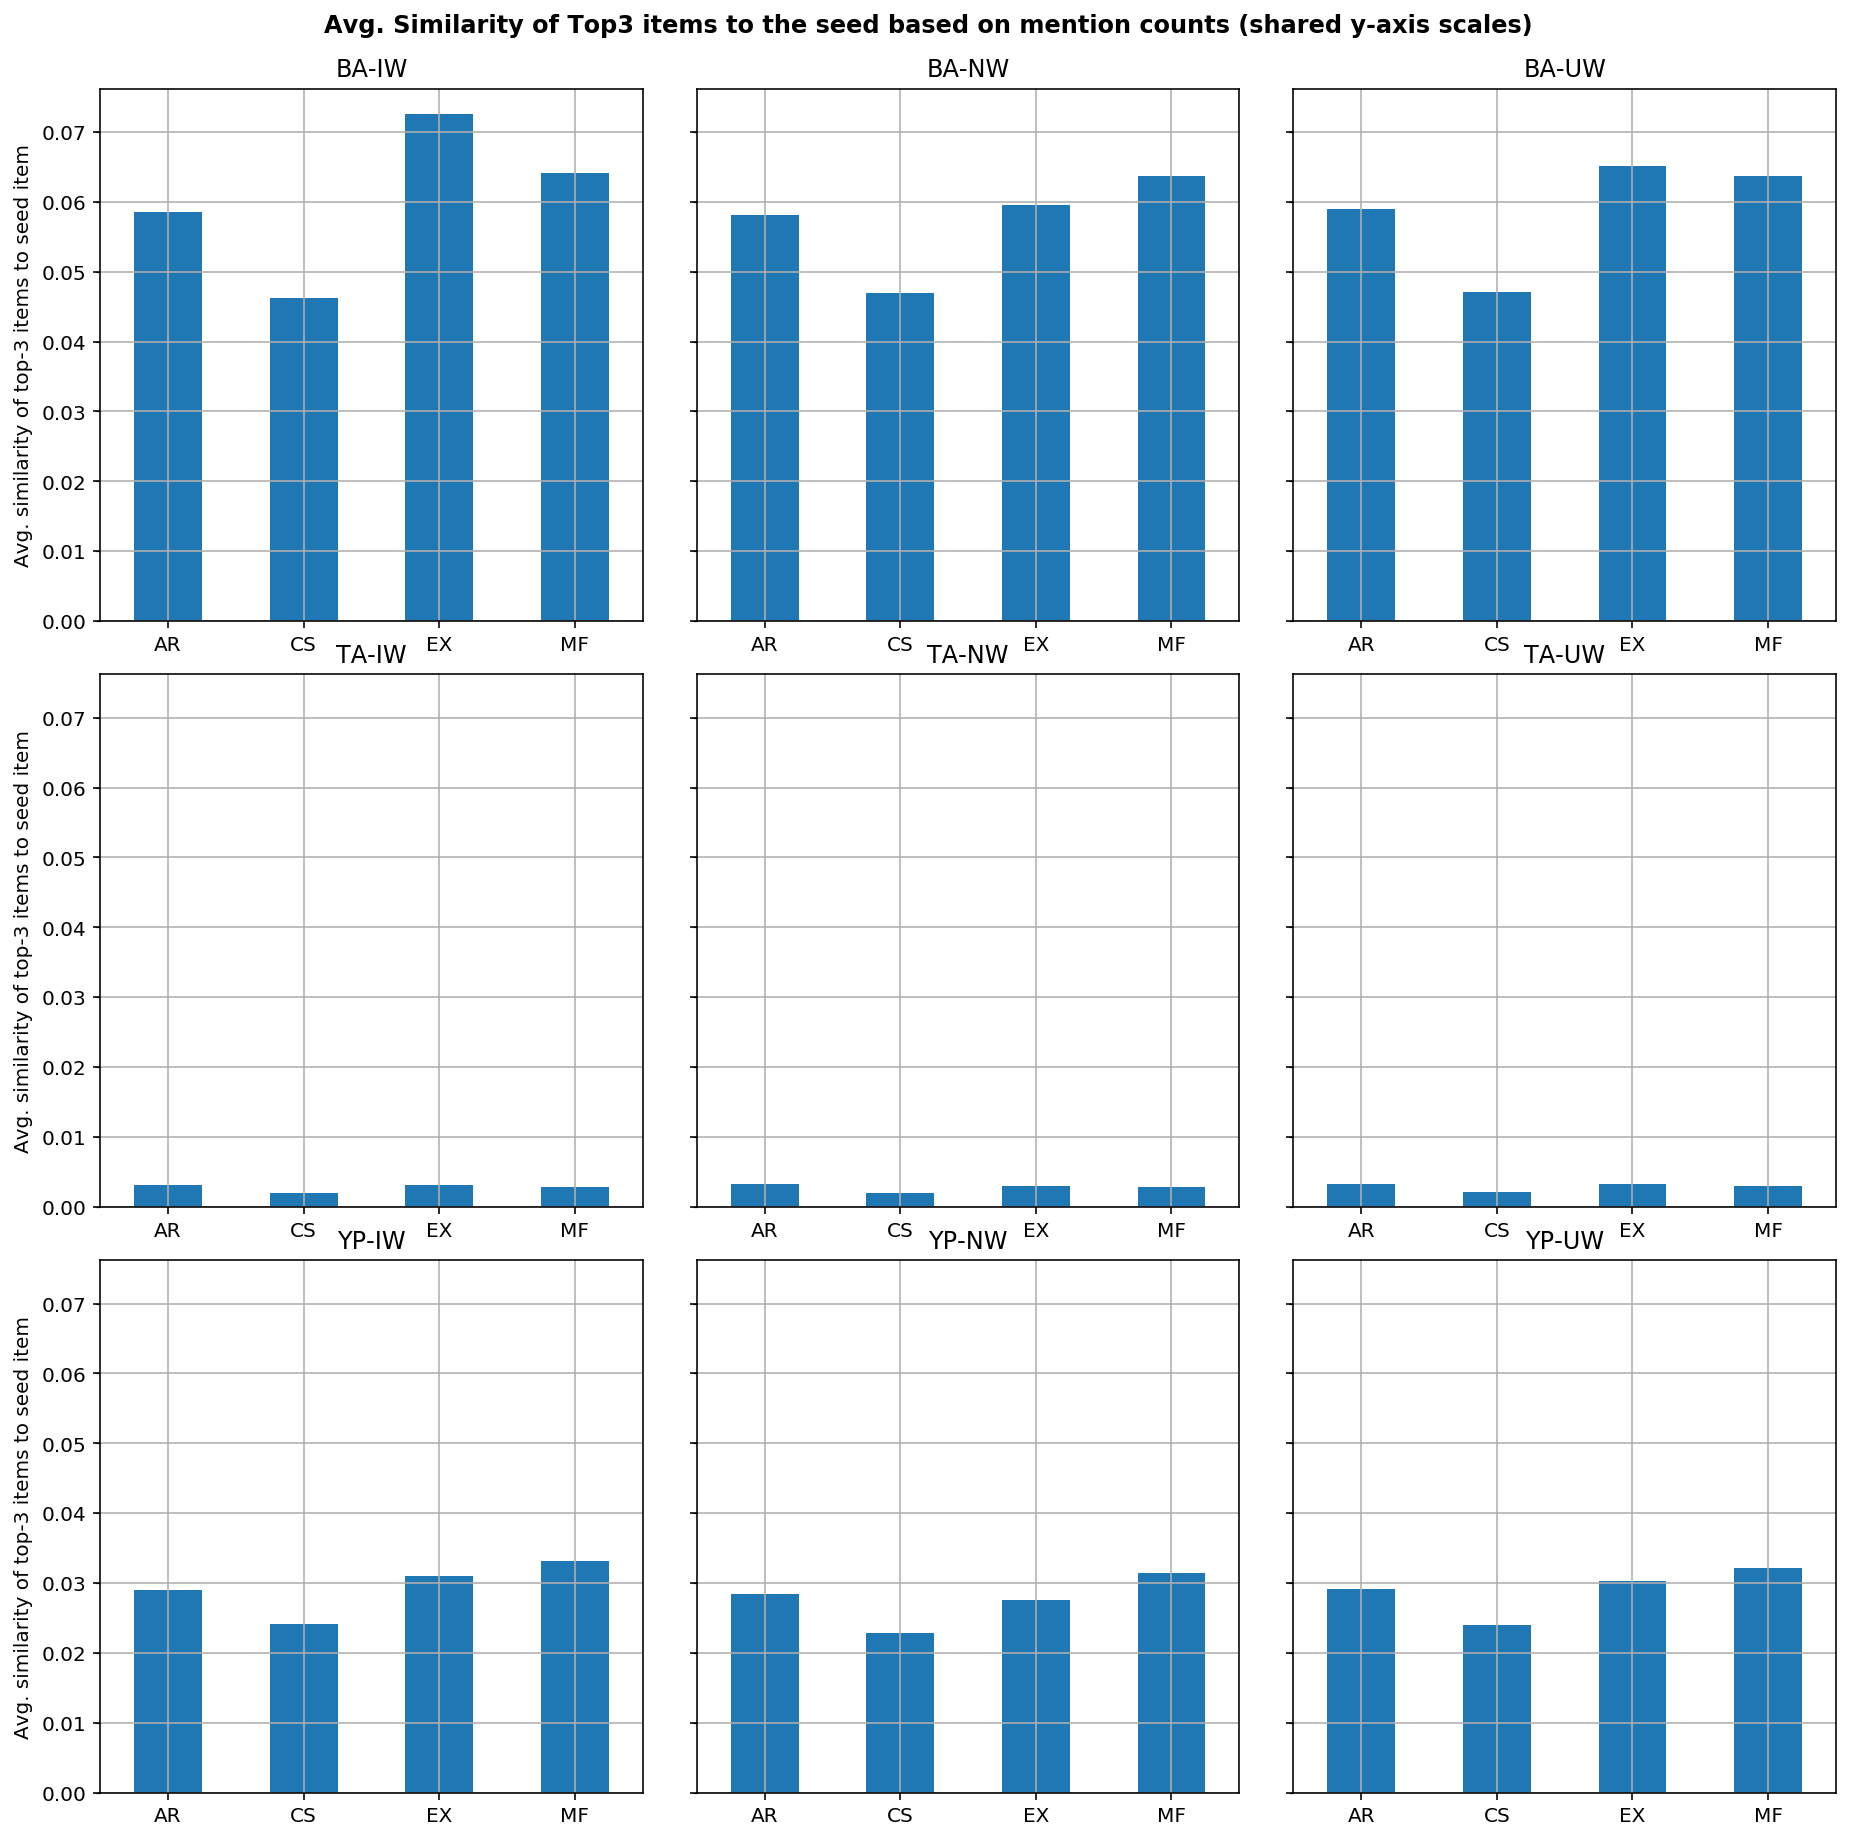

In [305]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13,13), sharex=False, sharey=True)
axes = axes.flatten()
dataset_ids = sorted(seed_item_sims.keys())
rank_col_map = {'rank_biasedmf': 'MF', 
                'rank_related_items_sims_np': 'CS', 
                'rank_target_item_average_rating': 'AR',
                'rank_strength': 'EX'}
for dataset_id, ax in zip(dataset_ids, axes):
    df_sims = seed_item_sims[dataset_id].copy()
    df_sims['rank_col'] = df_sims.rank_col.map(rank_col_map)

    df_sims.groupby('rank_col').avg_sim.mean().plot.bar(ax=ax, rot=0)
    ax.set_title(dataset_id.replace('_bw_', '-').upper(), fontsize=12)
    ax.set_ylabel('Avg. similarity of top-3 items to seed item')
    ax.set_xlabel('')
    ax.grid(True)

plt.suptitle('Avg. Similarity of Top3 items to the seed based on mention counts (shared y-axis scales)',
             fontweight='bold', fontsize='large')
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1,  top=0.94)

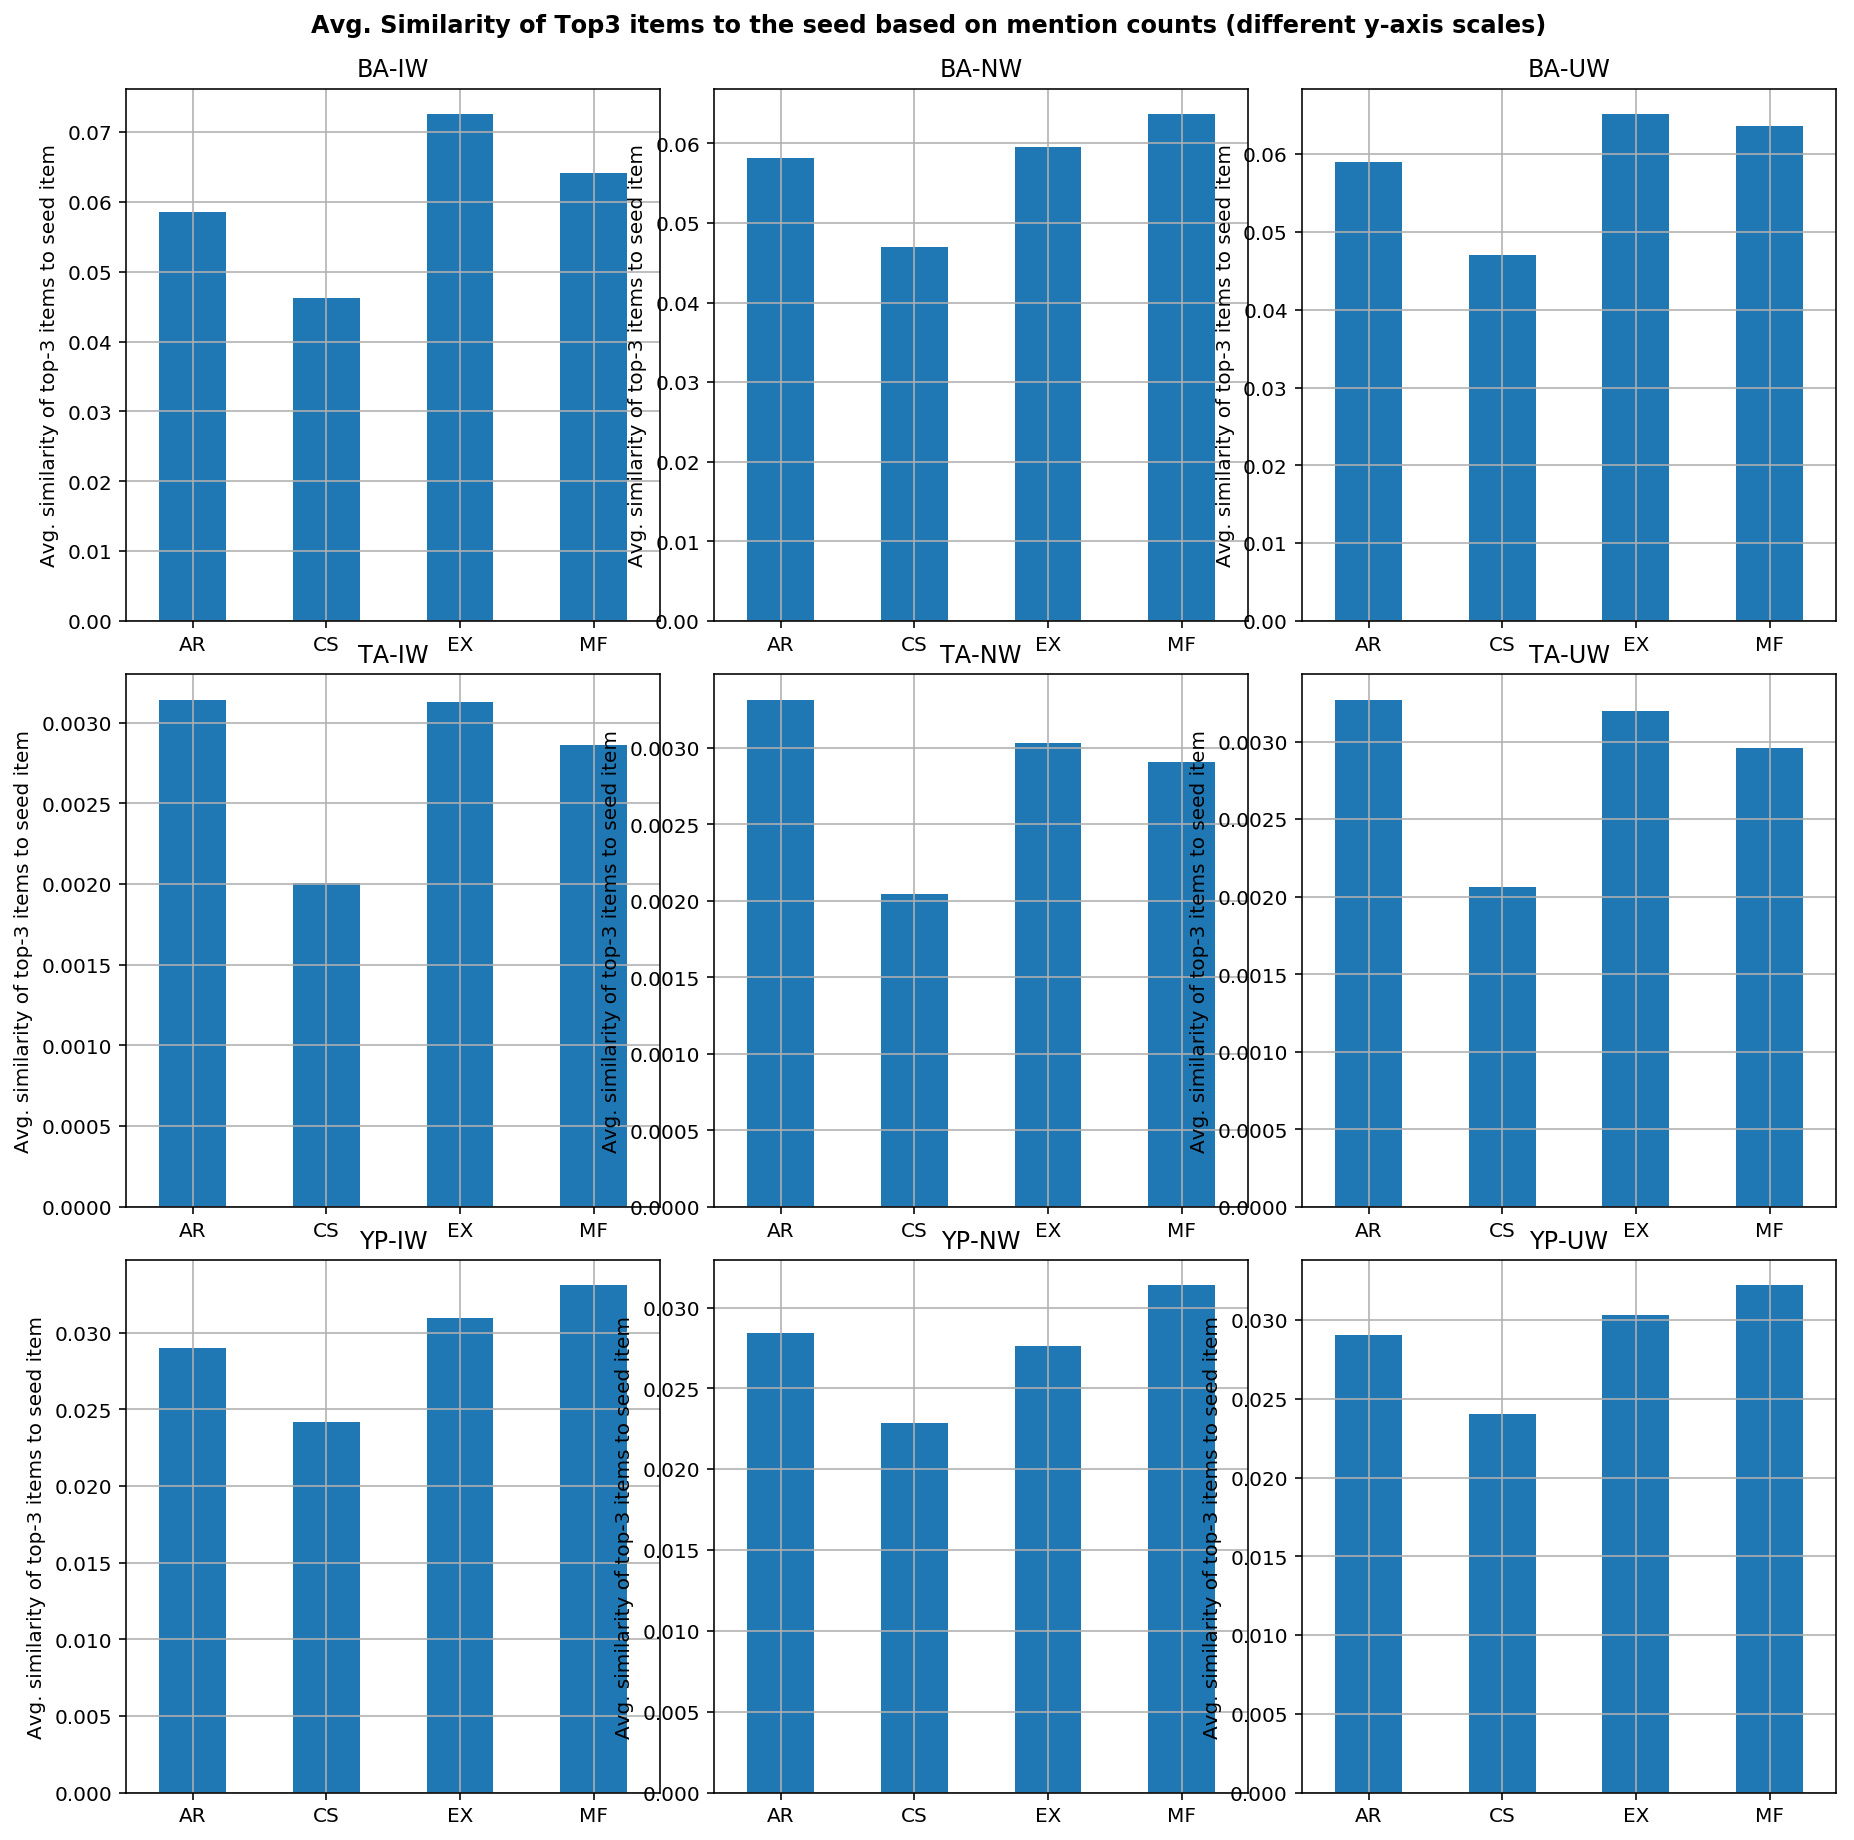

In [306]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13,13), sharex=False, sharey=False)
axes = axes.flatten()
dataset_ids = sorted(seed_item_sims.keys())
rank_col_map = {'rank_biasedmf': 'MF', 
                'rank_related_items_sims_np': 'CS', 
                'rank_target_item_average_rating': 'AR',
                'rank_strength': 'EX'}
for dataset_id, ax in zip(dataset_ids, axes):
    df_sims = seed_item_sims[dataset_id].copy()
    df_sims['rank_col'] = df_sims.rank_col.map(rank_col_map)

    df_sims.groupby('rank_col').avg_sim.mean().plot.bar(ax=ax, rot=0)
    ax.set_title(dataset_id.replace('_bw_', '-').upper(), fontsize=12)
    ax.set_ylabel('Avg. similarity of top-3 items to seed item')
    ax.set_xlabel('')
    ax.grid(True)

plt.suptitle('Avg. Similarity of Top3 items to the seed based on mention counts (different y-axis scales)',
             fontweight='bold', fontsize='large')
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1,  top=0.94)

### Approach 2: Compare the explanation of $I_b$ to the explanations of each of the recommendations to see whether the $I_b$ explanations is more or less compelling that the recommendations.

## NDCGs

### Load NDCGs

In [610]:
def load_ndcgs():
    for path in glob(NDCG_DIR + '*_sessions.csv'):
        # Get dataset name from file path.
        filename = path[path.rfind('/') + 1:]
        filename = filename.strip('_sessions.csv')
        filename = filename.replace('dcg-summary-', '')
        dataset = filename.replace('_bw_', '_')
#         dataset = filename.split('_')[2]
        
        df = pd.read_csv(path)
        df['dataset'] = dataset
        yield df
        
        
df_ndcgs_all = pd.concat(load_ndcgs())
display(df_ndcgs_all.head(2))
dataset_lookup = {'ta': 'TripAdvisor', 'ba': 'BeerAdvocate', 'yp': 'Yelp'}

,col,k,ndcg,dataset
0,rank_biasedmf,1,0.725461,ba_iw
1,rank_biasedmf,2,0.755599,ba_iw


In [612]:
df_ndcgs_all.col.unique()

array(['rank_biasedmf', 'rank_related_items_sims_np',
       'rank_related_items_sims_np_ndcg', 'rank_strength',
       'rank_strength_0.0', 'rank_strength_0.0_ndcg', 'rank_strength_0.1',
       'rank_strength_0.1_ndcg', 'rank_strength_0.2',
       'rank_strength_0.2_ndcg', 'rank_strength_0.3',
       'rank_strength_0.3_ndcg', 'rank_strength_0.4',
       'rank_strength_0.4_ndcg', 'rank_strength_0.5',
       'rank_strength_0.5_ndcg', 'rank_strength_0.6',
       'rank_strength_0.6_ndcg', 'rank_strength_0.7',
       'rank_strength_0.7_ndcg', 'rank_strength_0.8',
       'rank_strength_0.8_ndcg', 'rank_strength_0.9',
       'rank_strength_0.9_ndcg', 'rank_strength_1.0',
       'rank_strength_1.0_ndcg', 'rank_strength_comp',
       'rank_strength_comp_ndcg', 'rank_strength_ndcg',
       'rank_target_item_average_rating_ndcg'], dtype=object)

/Users/khalil/anaconda2/envs/cikm2017/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


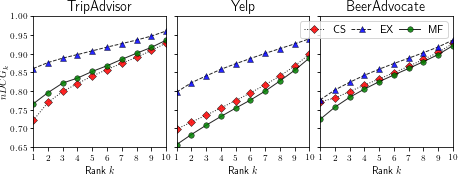

In [613]:
DATASET_LOOKUP = {'ba': 'BeerAdvocate', 'ta': 'TripAdvisor', 'yp': 'Yelp'}

figsize = figsize = figsize or (points_to_inches(col_width_pts), 3)
plot_ndcgs_all(df_ndcgs_all=df_ndcgs_all, col_width_pts=COLUMN_WIDTH_PTS*2, figures_dir=FIGURES_DIR,
               dataset_lookup=DATASET_LOOKUP, figsize=figsize)